In [4]:
pip install opencv-contrib-python

In [17]:
pip install --upgrade pip

In [1]:
pip install --upgrade pillow

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Activation

In [2]:
#Load Dataset

In [4]:
from glob import glob
import os
import cv2
import numpy as np
from skimage import io

Train = glob(f'G:/data/Train/*')

X_train = []
y_train = []

for i, folder in enumerate(Train):
    label = i
    images_path = glob(os.path.join(folder, '*'))
    for img_path in images_path:
        img = io.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (32, 32))
        X_train.append(img)
        y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

Test = glob(f'G:/data/Test/*')

X_test = []
y_test = []

for i, folder in enumerate(Test):
    label = i
    images_path = glob(os.path.join(folder, '*'))
    for img_path in images_path:
        img = io.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (32, 32))
        X_test.append(img)
        y_test.append(label)

X_test = np.array(X_test)
y_test = np.array(y_test)


In [5]:


print('Train data shape: {}'.format(X_train.shape))
print('Test  data shape: {}'.format(X_test.shape))

Train data shape: (2700, 32, 32, 3)
Test  data shape: (300, 32, 32, 3)


In [6]:
image_size = 32
num_channels = 3
num_features = image_size * image_size * num_channels
num_classes = 3

num_train = 2700

In [7]:
#Data Visualization

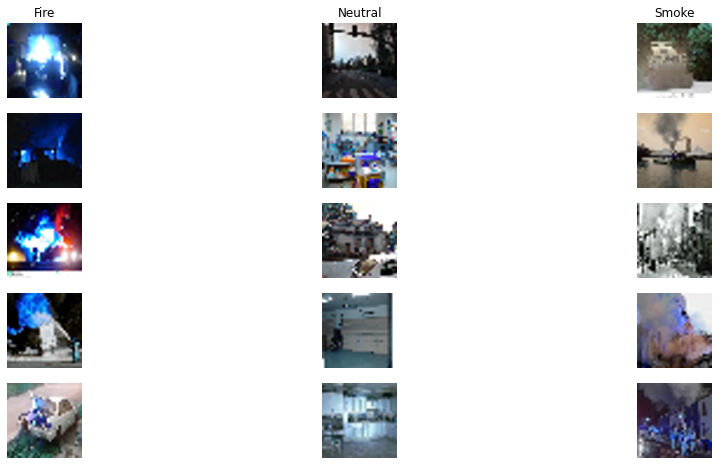

In [8]:
class_names = ['Fire', 'Neutral', 'Smoke']
samples_per_class = 5

plt.figure(figsize=(16, 8))

for cls, name in enumerate(class_names):
    idxs = np.flatnonzero(y_train == cls)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(samples_per_class, num_classes, i * num_classes + cls + 1)
        plt.imshow(X_train[idx], interpolation='spline16')
        plt.axis('off')
        if i == 0:
            plt.title(class_names[cls])

In [9]:
##Visualization and Underestanding CNN

In [10]:
%%HTML
<iframe width="854" height="480" src="https://www.youtube.com/embed/ghEmQSxT6tw" frameborder="0" gesture="media" allow="encrypted-media" allowfullscreen></iframe>

In [11]:
#convert pixel range from [0, 255] to [0., 1.]
X_train = X_train.astype('float32')
x_test  = X_test.astype('float32')

mu = np.mean(X_train, axis=0)

X_train -= mu
X_train /= 255.0

x_test -= mu
x_test /= 255.0

In [12]:
#One-hot encodding

In [13]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test,  num_classes)

print(y_train.shape)
print(y_test.shape)

(2700, 3)
(300, 3)


In [14]:
#Converting dataset to 4D array

In [15]:
X_train = X_train.reshape([-1, image_size, image_size, num_channels])
X_test  = X_test.reshape([-1, image_size, image_size, num_channels])
x_test  = x_test.reshape([-1, image_size, image_size, num_channels])


In [16]:
#Convolutional Neural Networks

In [17]:

from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dropout

In [18]:
def create_cnn():
    model = Sequential()

    # Conv Block 1
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Conv Block 2
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Conv Block 3
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Classifier
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

model = create_cnn()

#print model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0

In [21]:
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train[:num_train], y_train[:num_train],
          batch_size=10,
          epochs=1,
          validation_data=(X_train[num_train:], y_train[num_train:]))

270/270 [==============================] - 103s 367ms/step - loss: 0.5870 - accuracy: 0.7632


In [14]:
#Data Augmentation

In [22]:
model = create_cnn()
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
from keras.preprocessing.image import ImageDataGenerator

epochs = 5
batch_size = 10
data_augmentation = True


if not data_augmentation:
    print('Training without data augmentation.')
    model.fit(X_train[:num_train], y_train[:num_train], 
              batch_size=batch_size, 
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)
else:
    print('Training using real-time data augmentation.')
    datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False, 
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False,
        zca_whitening=False, 
        rotation_range=0, 
        width_shift_range=0.1, 
        height_shift_range=0.1, 
        horizontal_flip=True, 
        vertical_flip=False)
    
    datagen.fit(X_train[:num_train])
    
    model.fit_generator(datagen.flow(X_train[:num_train], y_train[:num_train], batch_size=batch_size),
                        steps_per_epoch=num_train//batch_size,
                        epochs=epochs,
                        validation_data=(X_train[num_train:], y_train[num_train:]))

Training using real-time data augmentation.
Epoch 1/5
270/270 [==============================] - 102s 377ms/step - loss: 0.5299 - accuracy: 0.7763
Epoch 2/5
270/270 [==============================] - 101s 374ms/step - loss: 0.5124 - accuracy: 0.8022
Epoch 3/5
270/270 [==============================] - 102s 379ms/step - loss: 0.4719 - accuracy: 0.8152
Epoch 4/5
270/270 [==============================] - 103s 380ms/step - loss: 0.4555 - accuracy: 0.8204
Epoch 5/5
270/270 [==============================] - 101s 373ms/step - loss: 0.4296 - accuracy: 0.8352


In [25]:
#Saving and Loading model

In [26]:
model.save('cnn_data_augmentation.h5')
model = keras.models.load_model('cnn_data_augmentation.h5')

In [31]:
model.evaluate(x_test, y_test, batch_size=10)

30/30 [==============================] - 3s 108ms/step - loss: 0.5913 - accuracy: 0.7767


[0.5912705063819885, 0.7766666412353516]

In [33]:
#Predicting class for new images

In [34]:
y_test = np.argmax(y_test, axis=1) # to 0, 1, 2

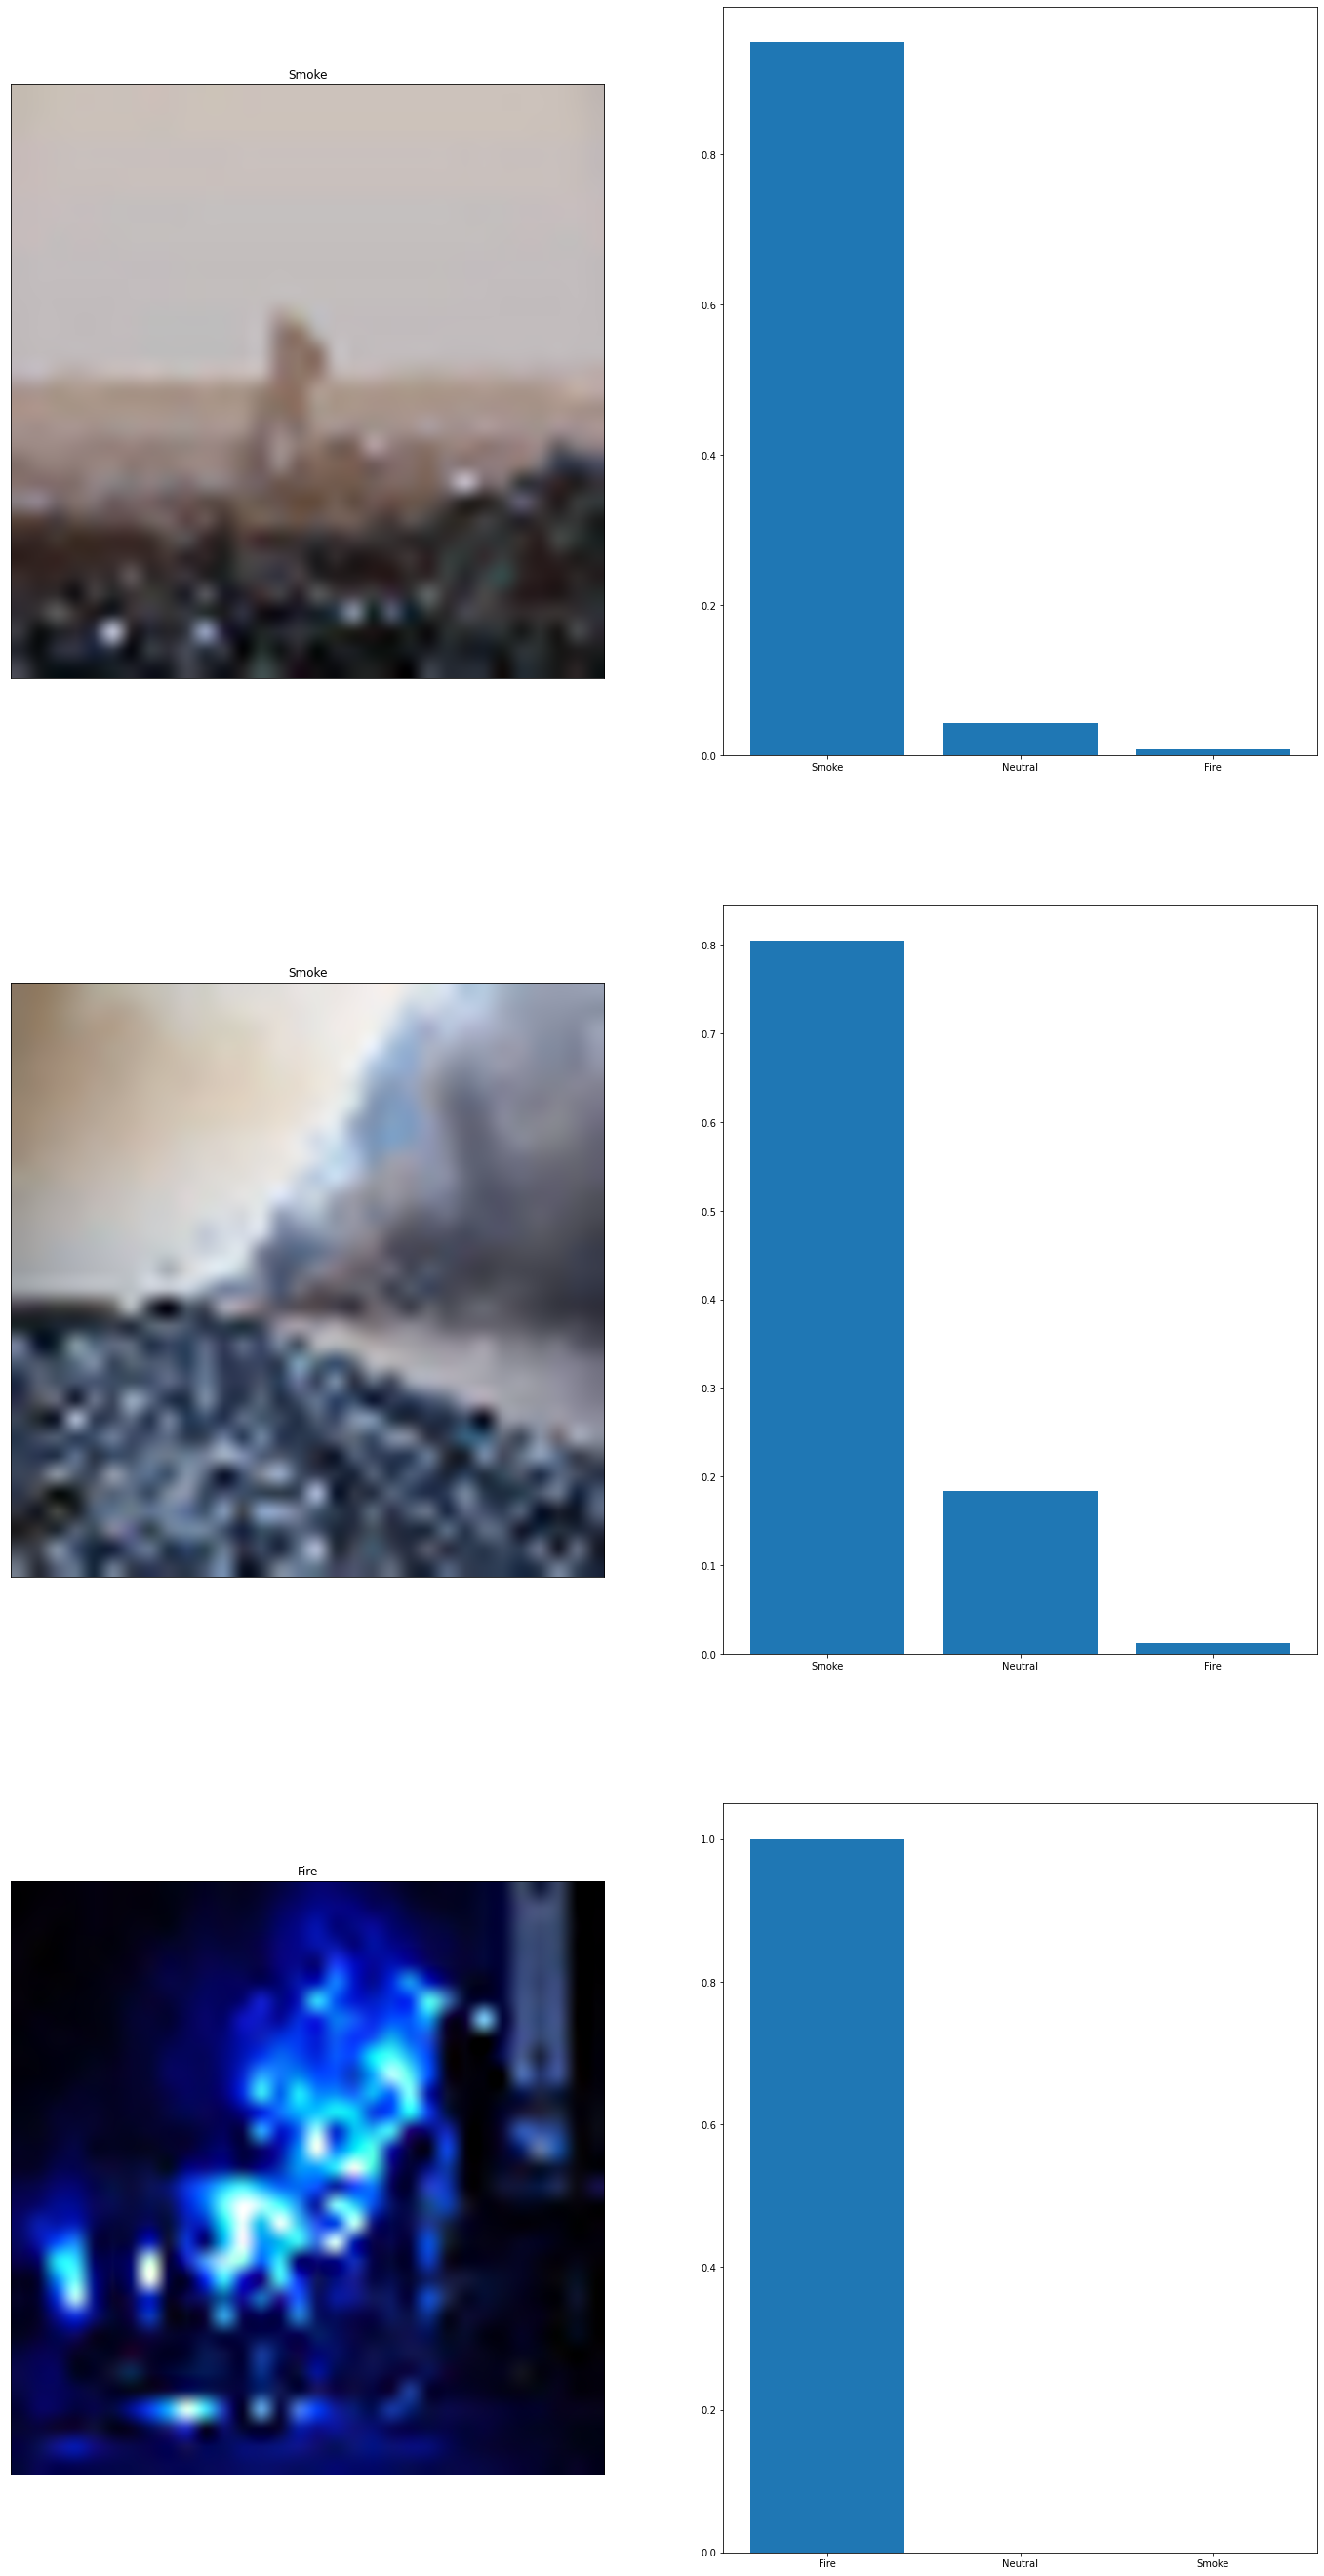

In [37]:

plt.figure(figsize=(24, 48))
idx = np.random.choice(len(x_test), 3, replace=False)

p = model.predict(x_test[idx])

for i in range(len(idx)):
    plt.subplot(3, 2, 2*i+1)
    plt.imshow(X_test[idx[i]], interpolation='spline16')
    plt.title(class_names[y_test[idx[i]]])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred_label = np.argsort(-p[i])[:3]
    pred_prob = [p[i][l] for l in pred_label]
    pred_label = [class_names[l] for l in pred_label]
    
    plt.subplot(3, 2, 2*i+2)
    plt.bar(range(3), pred_prob)
    plt.xticks(range(3), pred_label)

plt.show()